# Problem 3: Freeze-in of particle species

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scienceplots
from scipy import integrate 

In [2]:
plt.style.use(['science','notebook'])

In [105]:
def Y_eq(x): return ((x/(2*np.pi))**(3/2)*np.exp(-x))

In [106]:
y0 = 10**-20 # initial value of y given by problem -> y0 = y(~0.01) = ~10^-20

In [107]:
lambda_vals = [10**-6, 10**-8, 10**-10] # three lambda values given by problem

In [108]:
def dy (lambda_val, x_arr): # function for dy/dx. we will integrate this numerically to get a function y(x) to plot
    
    npoints = int(len(x_arr))
    output = [0]*npoints
    for i in range (npoints):
        output[i] = lambda_val*x_arr[i]*(x_arr[i]/(x_arr[i]+2))*Y_eq(x_arr[i])
        
    return output

In [115]:
x_arr = np.linspace(0.01,100,700) # create our array of x values (range given by problem)

In [116]:
# integrate dy/dx to get y(x)
def y (lambda_val, x_arr): return (integrate.cumulative_trapezoid(y = dy(lambda_val, x_arr), x = x_arr) + y0)

In [117]:
y1 = y(lambda_vals[0],x_arr) # evaluate Y(x) with three different lambda values
y2 = y(lambda_vals[1],x_arr)
y3 = y(lambda_vals[2],x_arr)
y_eq = Y_eq(x_arr)

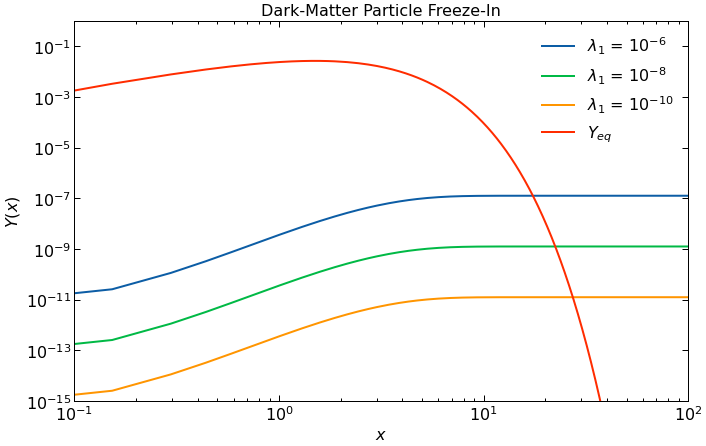

In [118]:
plt.figure(figsize=(11,7))

plt.yscale("log")
plt.xscale("log")
plt.xlim([0.1,100]) # x range to plot given by problem
plt.ylim([10**-15,1])

plt.plot(x_arr[:-1], y1, "-", linewidth = 2, label = r"$\lambda_{1}$ = $10^{-6}$")
plt.plot(x_arr[:-1], y2, "-", linewidth = 2, label = r"$\lambda_{1}$ = $10^{-8}$")
plt.plot(x_arr[:-1], y3, "-", linewidth = 2, label = r"$\lambda_{1}$ = $10^{-10}$")
plt.plot(x_arr, y_eq, "-", linewidth = 2, label = r"$Y_{eq}$") # plot y_eq

plt.title("Dark-Matter Particle Freeze-In")
plt.xlabel("$x$")
plt.ylabel("$Y(x)$")
plt.legend()
plt.show()